In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Cargar features ===

In [66]:
# Cargar el dataset (puede ser un archivo grande, considera usar 'low_memory=False')
root_peth = '/home/javi/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/'
features = pd.read_csv(root_peth+'NUSW-NB15_features.csv', low_memory=False,header=None)
features.columns = ["id", "feature", "type", "category"]
features.head()

,id,feature,type,category
0,No.,Name,Type,Description
1,1,srcip,nominal,Source IP address
2,2,sport,integer,Source port number
3,3,dstip,nominal,Destination IP address
4,4,dsport,integer,Destination port number


# === 2. Cargar datasets ===

In [67]:
files = ["UNSW-NB15_1.csv", "UNSW-NB15_2.csv", "UNSW-NB15_3.csv", "UNSW-NB15_4.csv"]
df = pd.concat([pd.read_csv(root_peth+f, low_memory=False,header=None) for f in files], ignore_index=True)
df.shape

KeyboardInterrupt: 

In [30]:
df = df.rename(columns={47: 'label'})

# === 3. Información general ===

In [19]:
print("\nTipos de datos:")
df.dtypes.value_counts()


Tipos de datos:


int64      28
float64    12
object      9
Name: count, dtype: int64

In [20]:
print("\nValores nulos por columna:")
df.isnull().sum().sort_values(ascending=False).head(10)


Valores nulos por columna:


47    2218764
38    1429879
37    1348145
36          0
27          0
28          0
29          0
30          0
31          0
32          0
dtype: int64

# === 4. Clases (label columna 'label' -> 0: normal, 1: ataque) ===

In [31]:
print("\nDistribución de clases:")
df['label'].value_counts()


Distribución de clases:


label
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: count, dtype: int64

In [45]:
# Creando una función para la lógica
def clasificar_ataque(label):
    if pd.isna(label):
        return 'no identificado'  # Puedes devolver None para los nulos si los quieres manejar de forma diferente
    elif label == 'Generic':
        return 'normal'
    else:
        return 'ataque'

In [46]:
# Aplicando la función a la columna 'label'
df['ataque'] = df['label'].apply(clasificar_ataque)

In [47]:
df['ataque'].value_counts()

ataque
no identificado    2218764
normal              215481
ataque              105802
Name: count, dtype: int64

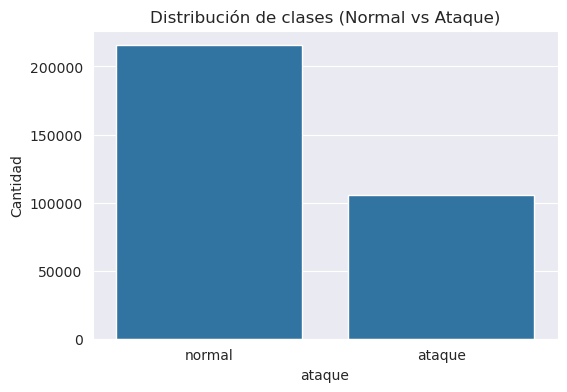

In [59]:
conteo = df['ataque'].value_counts()
conteo = conteo.drop("no identificado", errors="ignore")

plt.figure(figsize=(6,4))
sns.barplot(x=conteo.index, y=conteo.values)
plt.title("Distribución de clases (Normal vs Ataque)")
plt.ylabel("Cantidad")
plt.show()


# === 5. Tipos de ataques ===

In [61]:
print("\nEstadísticas descriptivas:")
df.describe(include="all").transpose().head(20)


Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,2540047,43,59.166.0.4,197959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2540047.0,129124.0,1043.0,214363.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2540047,47,149.171.126.3,197771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2540047,64630,53,798968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2540047,135,tcp,1495074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2540047,16,FIN,1478689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2540047.0,NaN,NaN,NaN,0.658792,13.924931,0.0,0.001037,0.015861,0.214554,8786.637695
7,2540047.0,NaN,NaN,NaN,4339.600064,56405.994681,0.0,200.0,1470.0,3182.0,14355774.0
8,2540047.0,NaN,NaN,NaN,36427.593728,161096.035542,0.0,178.0,1820.0,14894.0,14657531.0
9,2540047.0,NaN,NaN,NaN,62.781975,74.622765,0.0,31.0,31.0,31.0,255.0


# === 7. Correlación ===

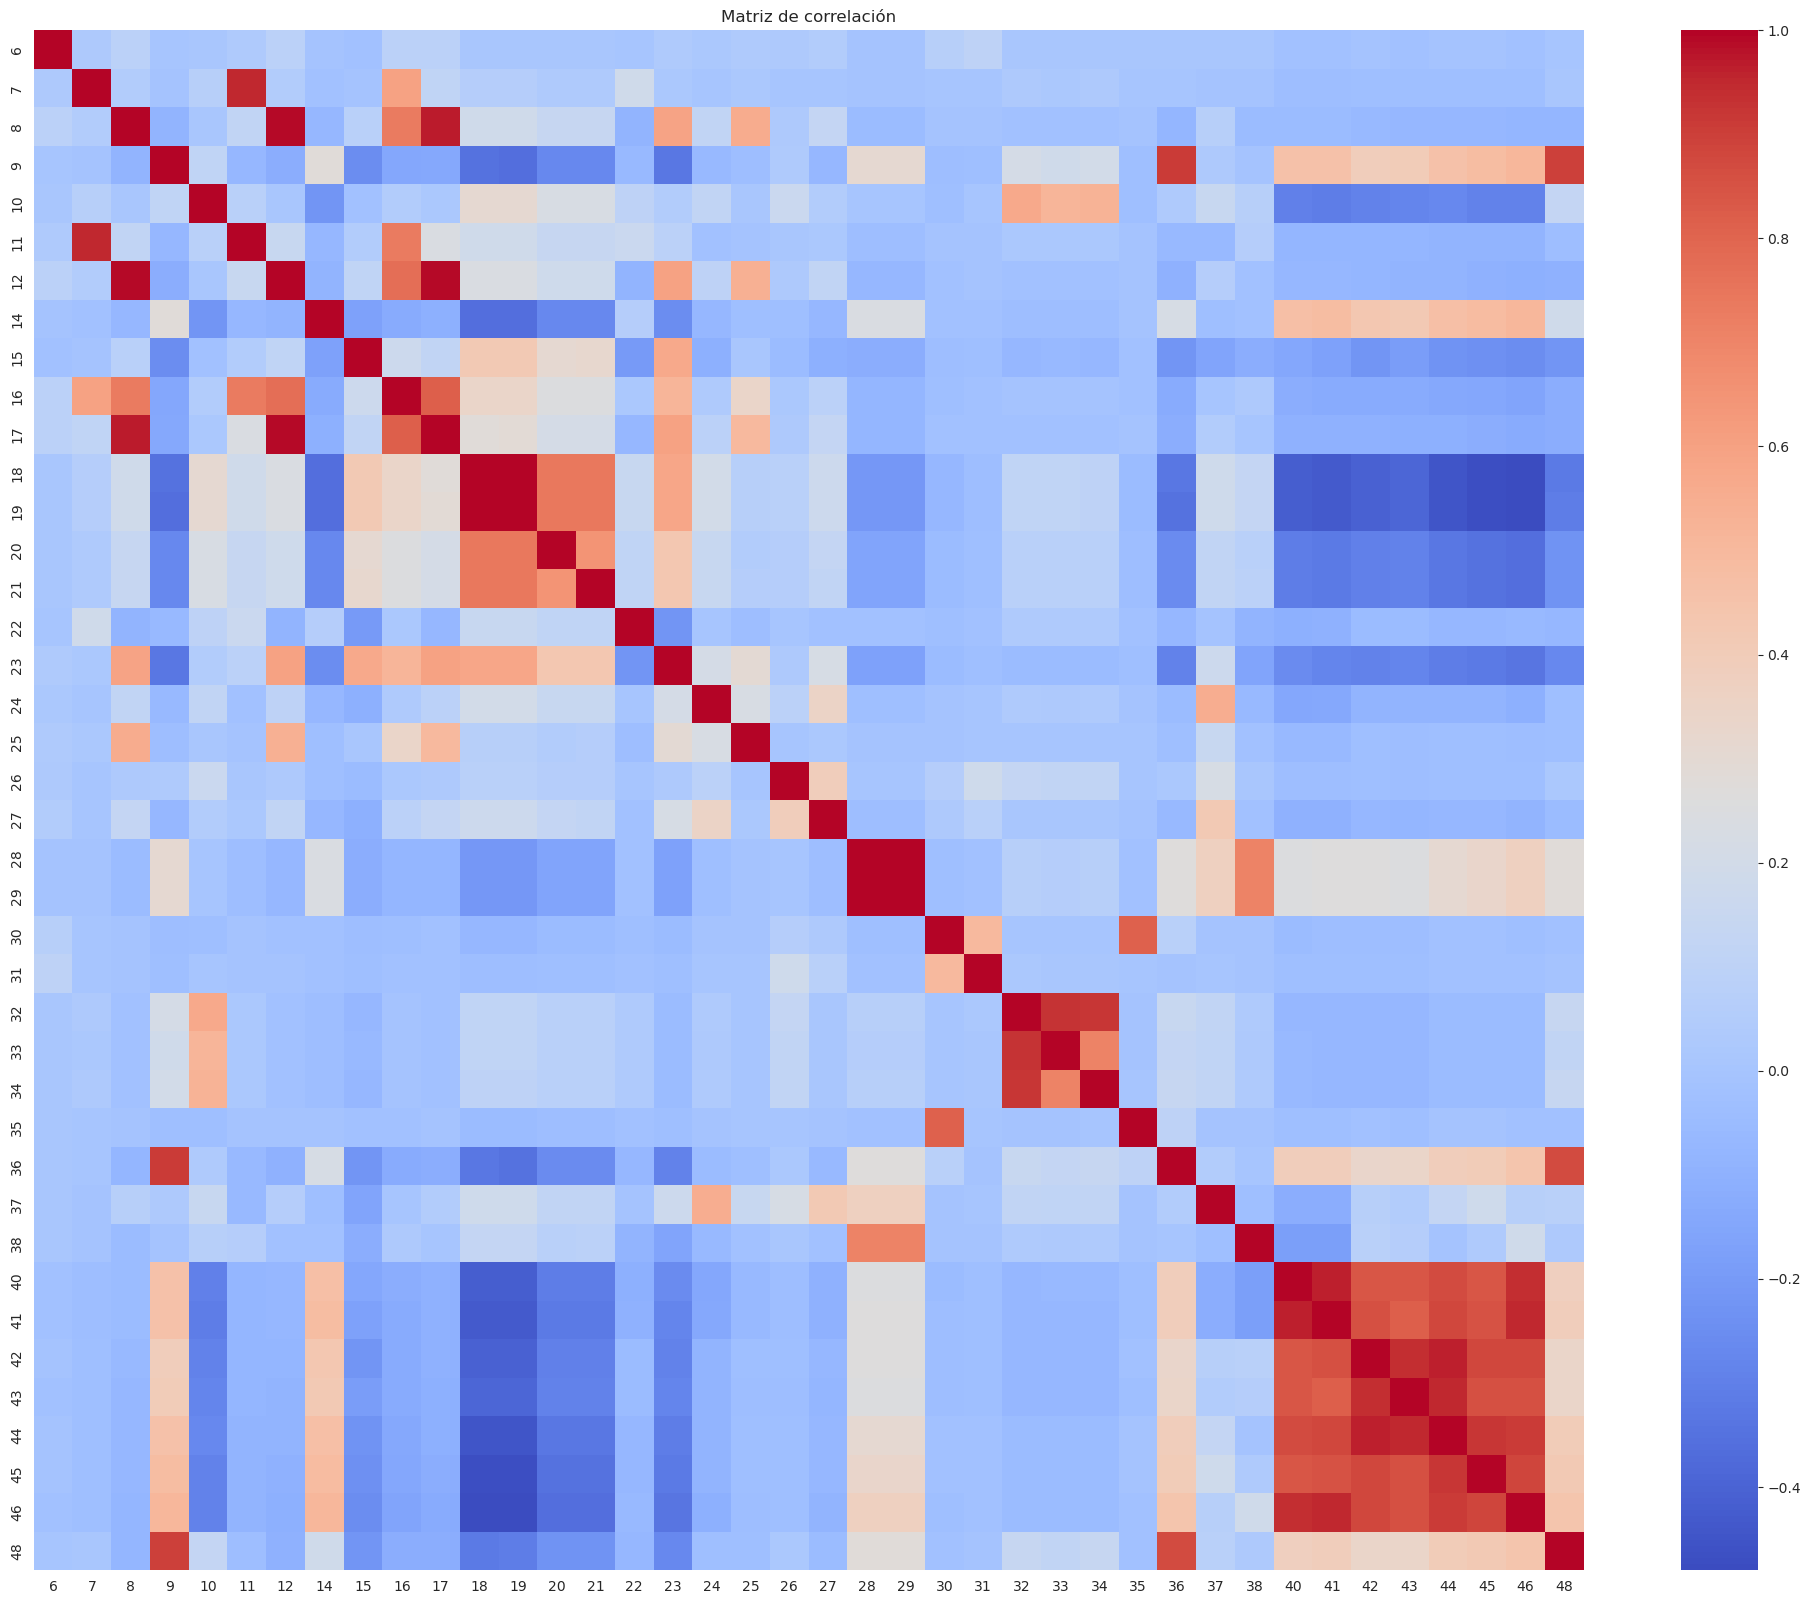

In [64]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(numeric_only=True).round(2), cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()